# Carga y limpieza de la data

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [17]:
def read_csv(file_name: str, path="D:/Repositorio/Proyecto-titanic/Data") -> pd.DataFrame:
    """
    Read csv file
    :param file_name: file name
    :param path: path to the file
    :return: pandas dataframe
    """
    return pd.read_csv(os.path.join(path, file_name))

In [18]:
df_titanic = read_csv("titanic.csv")

In [19]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


* PassengerId: Identificador único para cada pasajero.
* Survived: Indicador de si el pasajero sobrevivió (1) o no (0).
* Pclass: Clase de pasajero (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase).
* Name: Nombre del pasajero.
* Sex: Género del pasajero (Male = Masculino, Female = Femenino).
* Age: Edad del pasajero. Puede haber valores faltantes (NaN).
* SibSp: Número de hermanos/cónyuges a bordo del Titanic.
* Parch: Número de padres/hijos a bordo del Titanic.
* Ticket: Número de ticket.
* Fare: Tarifa del pasaje.
* Cabin: Número de cabina. Puede haber valores faltantes (NaN).
* Embarked: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

In [20]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [22]:
df_titanic.duplicated().any()

False

In [23]:
df_titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [27]:
df_titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [32]:
numeric = df_titanic.select_dtypes(include=["float64", "int64"])
q1 = numeric.quantile(0.25)
q3 = numeric.quantile(0.75)
iqr = q3 - q1  # Rango intercuartílico

# Calcular los límites para los outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Encontrar outliers
outliers = (numeric < limite_inferior) | (numeric > limite_superior)
print(outliers.sum())

Survived                     0
Pclass                       0
Age                         13
Siblings/Spouses Aboard     46
Parents/Children Aboard    213
Fare                       116
dtype: int64


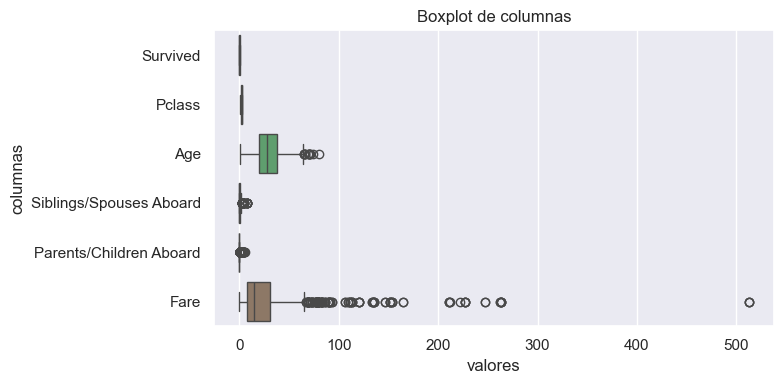

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot(data = numeric, orient="h")
plt.title("Boxplot de columnas")
plt.xlabel("valores")
plt.ylabel("columnas")
plt.tight_layout()
plt.show()

In [36]:
# Conocer las estadisticas de los sobrevivinetes
columnas = ["Survived", "Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]
agrupacion = df_titanic[columnas].groupby("Survived")
agrupacion.agg(["count", "mean", "std", "min", "max"])

Pclass                               Age                              \
          count      mean       std min max count       mean        std   min   
Survived                                                                        
0           545  2.528440  0.737405   1   3   545  30.138532  13.898317  1.00   
1           342  1.950292  0.863321   1   3   342  28.408392  14.427863  0.42   

                ... Parents/Children Aboard                              Fare  \
           max  ...                   count      mean       std min max count   
Survived        ...                                                             
0         74.0  ...                     545  0.332110  0.825699   0   6   545   
1         80.0  ...                     342  0.464912  0.771712   0   5   342   

                                               
               mean        std  min       max  
Survived                                       
0         22.208584  31.484153  0.0  263.0000  
1         48.395408  66.596998  0.0  512.3292  

[2 rows x 25 columns]

In [40]:
col_categoricas = ["Survived", "Pclass", "Sex", "Siblings/Spouses Aboard", "Parents/Children Aboard"]
for col in col_categoricas:
    print(f"Columna {col}: {df_titanic[col].unique()} subnivel") # si ponemos nunique nos da la cantidad de subniveles

Columna Survived: [0 1] subnivel
Columna Pclass: [3 1 2] subnivel
Columna Sex: ['male' 'female'] subnivel
Columna Siblings/Spouses Aboard: [1 0 3 4 2 5 8] subnivel
Columna Parents/Children Aboard: [0 1 2 5 3 4 6] subnivel


In [44]:
# Verificamos las columnas con datos numerico
df_titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [45]:
df_titanic.duplicated().any()

False

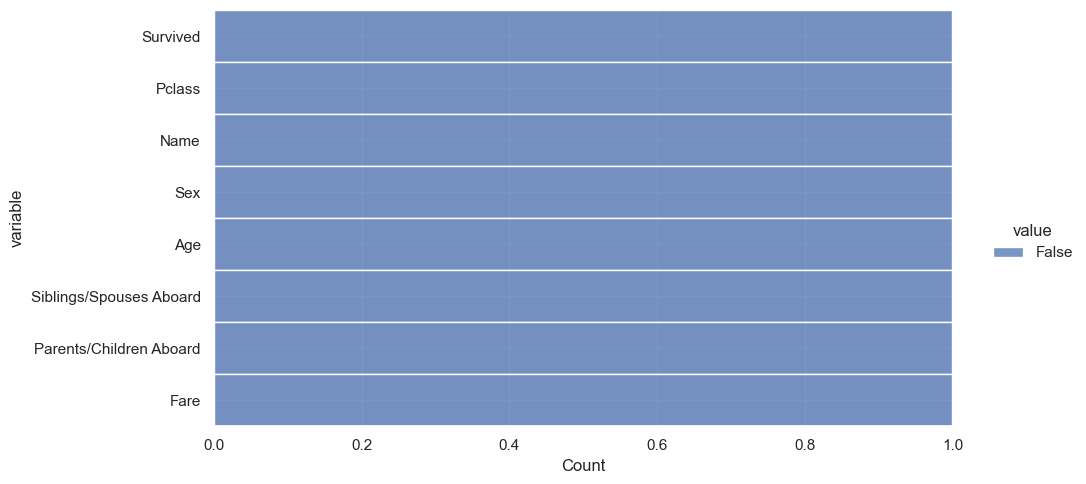

In [48]:
#ver en grafica la cantidad de valores faltantes
df_titanic.isnull().melt().pipe(lambda df_titanic:(sns.displot(data=df_titanic, y="variable", hue="value", multiple="fill", aspect=2)))
plt.show()

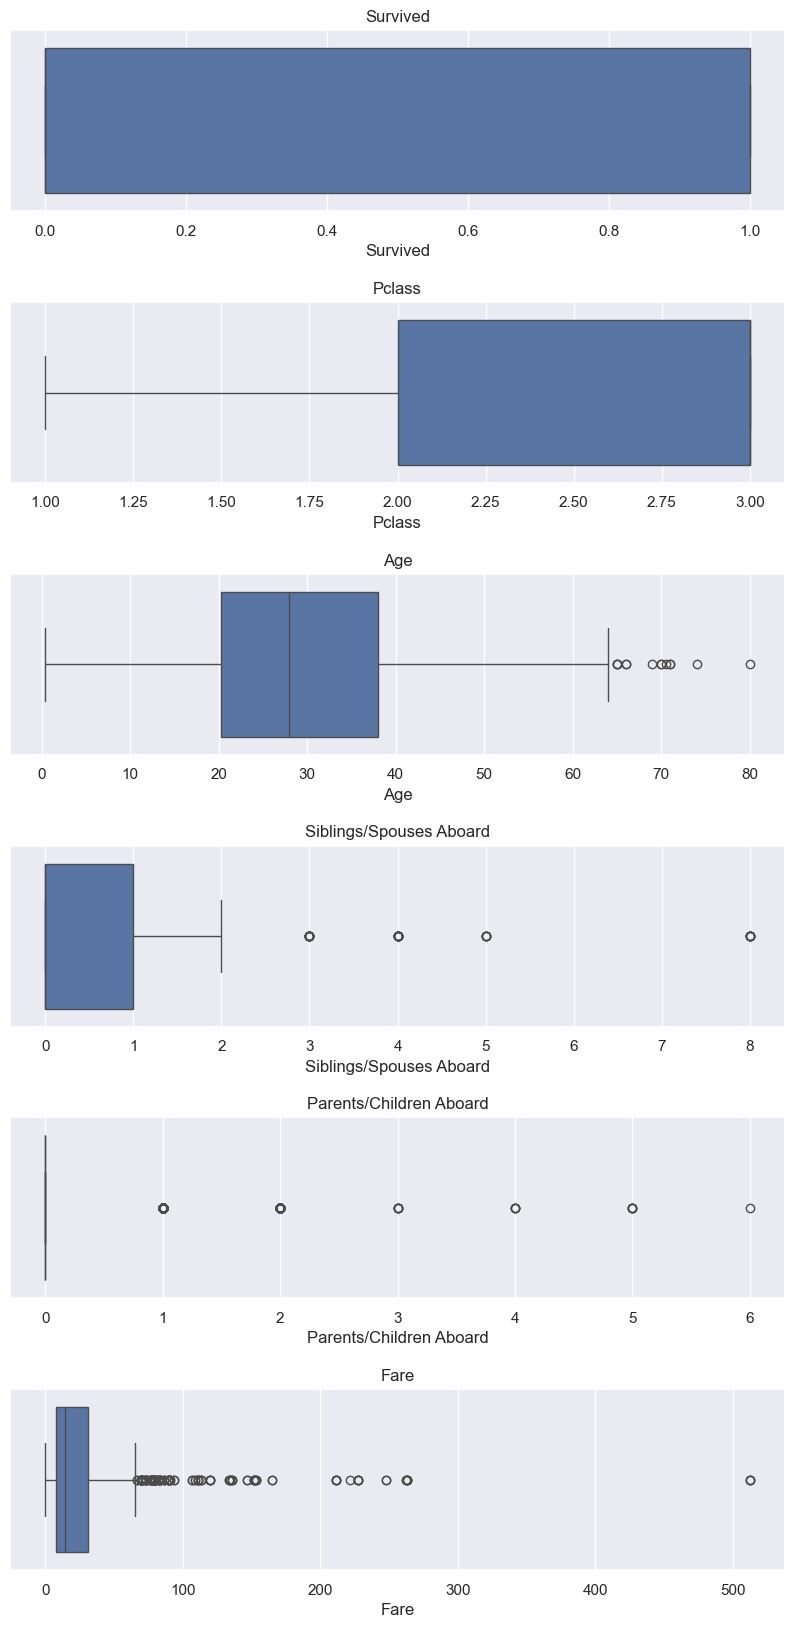

In [50]:
# Veremos mas a detalle de los valores atipicos
fig, ax = plt.subplots(6,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
for i, col in enumerate(numeric):
    sns.boxplot(x = col, data=numeric, ax = ax[i])
    ax[i].set_title(col)
    
plt.show()

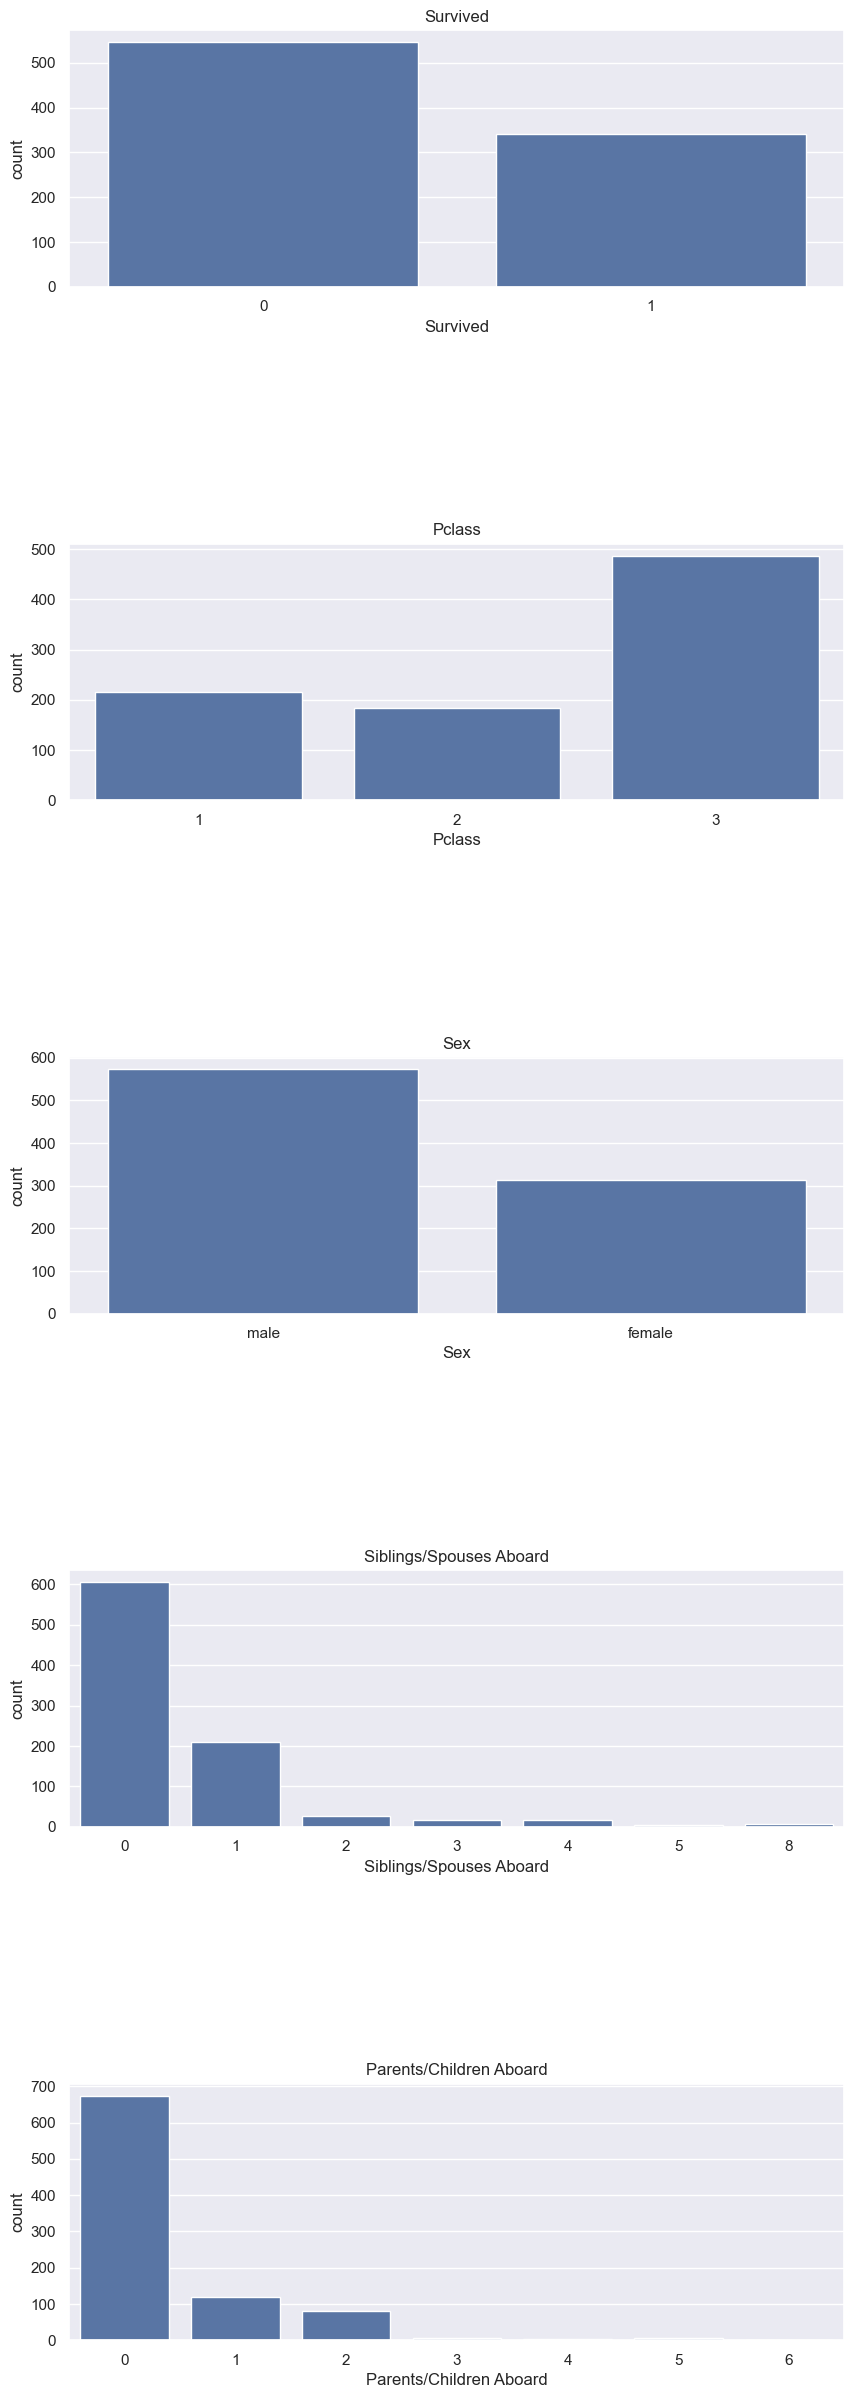

In [53]:
for column in df_titanic.columns:
    #Representar en minusculas solo si la columna es categorica
    if column in col_categoricas:
        # Verificar si la columna es de tipo cadena (string)
        if pd.api.types.is_string_dtype(df_titanic[column]):
            # Aplicar str.lower() solo si la columna es de tipo cadena
            df_titanic[column] = df_titanic[column].str.lower()
#Grifiquemos los graficos nuevamente
fig, ax = plt.subplots(nrows = 5, ncols= 1, figsize = (10,30))
fig.subplots_adjust(hspace= 1)

for i, col in enumerate (col_categoricas):
    sns.countplot(x=col, data= df_titanic, ax=ax[i])
    ax[i].set_title(col)